In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:

data_fake=pd.read_csv('Fake.csv')
data_true=pd.read_csv('True.csv')


In [3]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
data_fake["class"]=0
data_true["class"]=1

In [6]:
data_fake.shape , data_true.shape

((23481, 5), (21417, 5))

In [7]:
data_fake_manual_testing=data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i],axis=0,inplace=True)

data_true_manual_testing=data_true.tail(10)
for i in range(21416,21406,-1):
    data_true.drop([i],axis=0,inplace=True)

In [8]:
data_fake.shape , data_true.shape


((23471, 5), (21407, 5))

In [9]:
data_fake_manual_testing['class']=0
data_true_manual_testing['class']=1

C:\Users\bilas\AppData\Local\Temp\ipykernel_18020\1676563180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
C:\Users\bilas\AppData\Local\Temp\ipykernel_18020\1676563180.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class']=1


In [61]:
 
data_merge= pd.concat([data_fake,data_true],axis=0)
 
data.reset_index(drop=True, inplace=True)

In [62]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [63]:
 
data=data_merge.drop(['title','subject','date'],axis=1)

In [64]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [65]:
 
data=data.sample(frac=1)
data.head()

,text,class
374,WASHINGTON (Reuters) - U.S. Secretary of State...,1
14232,It s hard to imagine a President who could be ...,0
16946,BRUSSELS (Reuters) - European Commission Presi...,1
11577,SYDNEY (Reuters) - Australia will end air stri...,1
6959,Every website has a 404 page that you land on ...,0


In [66]:
data.reset_index(inplace=True) 
data.drop(['index'],axis=1,inplace=True)

In [67]:
data.columns

Index(['text', 'class'], dtype='object')

In [68]:
data.head()

,text,class
0,WASHINGTON (Reuters) - U.S. Secretary of State...,1
1,It s hard to imagine a President who could be ...,0
2,BRUSSELS (Reuters) - European Commission Presi...,1
3,SYDNEY (Reuters) - Australia will end air stri...,1
4,Every website has a 404 page that you land on ...,0


In [69]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\.\s+', '', text)            # remove URLs
    text = re.sub(r'[^a-zA-Z ]', '', text)         # remove special chars
    text = re.sub('\[.*?]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n', '',text)
    text = re.sub('\w*\d\w*', '',text)
    text = ' '.join([w for w in text.split() if w not in stop_words])
    return text




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bilas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
data["text"] = data["text"].apply(clean_text)

In [20]:
x = data['text']
y = data['class']

In [21]:
x_train, x_test, y_train, y_test = train_test_split( 
    x, y, test_size=0.2, random_state=42)

In [22]:

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [23]:
 
lr = LogisticRegression()
lr.fit(xv_train, y_train)
lr_pred = lr.predict(xv_test)


In [24]:
lr.score(xv_test,y_test)

0.9887477718360071

In [25]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4723
           1       0.99      0.99      0.99      4253

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [26]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(xv_train, y_train)
svm_pred = svm.predict(xv_test)

In [27]:
svm.score(xv_test,y_test)

0.9958778966131907

In [28]:
#decision tree...
dr = DecisionTreeClassifier()
dr.fit(xv_train, y_train)
dr_pred = lr.predict(xv_test)

In [29]:
dr.score(xv_test,y_test)

0.9965463458110517

In [30]:
#random forest...
rf = RandomForestClassifier(n_estimators=50, 
    max_depth=20,
    n_jobs=-1, 
    random_state=42)
rf.fit(xv_train, y_train)
rf_pred = rf.predict(xv_test)


In [31]:
rf.score(xv_test,y_test)

0.9827317290552585

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xv_train, y_train)
knn_pred = knn.predict(xv_test)


In [33]:
knn.score(xv_test,y_test)

0.6293449197860963

In [34]:
# !pip install xgboost


In [35]:
 # pip install --upgrade pip

In [37]:
import sys
print(sys.executable)


C:\Users\bilas\AppData\Local\Programs\Python\Python311\python.exe


In [60]:
import sys
!{sys.executable} -m pip install xgboost


In [40]:

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    n_jobs=-1,  # use all CPU cores
    eval_metric='logloss'
)

xgb.fit(xv_train, y_train)
xgb.score(xv_test, y_test)



0.9971033868092691

In [42]:
xgb_pred = xgb.predict(xv_test)

In [44]:
nb = MultinomialNB()
nb.fit(xv_train, y_train)
nb_pred = nb.predict(xv_test)

nb.score(xv_test, y_test)


0.9428475935828877

In [45]:
models = {
    "Logistic Regression": lr_pred,
    "Naive Bayes": nb_pred,
    "SVM": svm_pred,
    "Decision Tree": dr_pred,
    "Random Forest": rf_pred,
    "KNN": knn_pred,
    "XGBoost": xgb_pred,
}

for name, pred in models.items():
    print(f"\n{name} Accuracy:", accuracy_score(y_test, pred))



Logistic Regression Accuracy: 0.9887477718360071

Naive Bayes Accuracy: 0.9428475935828877

SVM Accuracy: 0.9958778966131907

Decision Tree Accuracy: 0.9887477718360071

Random Forest Accuracy: 0.9827317290552585

KNN Accuracy: 0.6293449197860963

XGBoost Accuracy: 0.9971033868092691


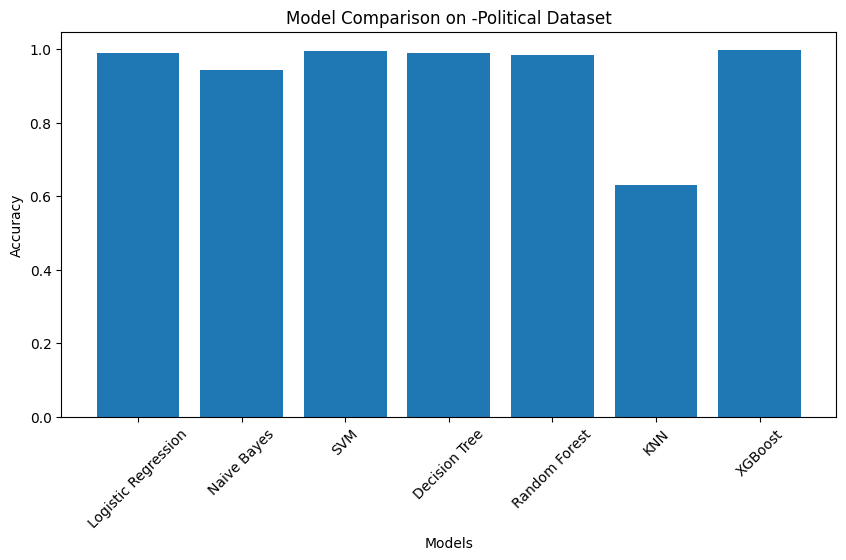

In [59]:
acc = {name: accuracy_score(y_test, pred) for name, pred in models.items()}

plt.figure(figsize=(10,5))
plt.bar(acc.keys(), acc.values())
plt.xticks(rotation=45)
plt.title("Model Comparison on -Political Dataset")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.show()


In [51]:
from sklearn.metrics import f1_score
import pandas as pd


In [ ]:
print("Fake news detection on Politics")
results = {
    "Model": [
        "Logistic Regression",
        "Naive Bayes",
        "SVM (LinearSVC)",
        "Decision Tree",
        "Random Forest",
        "KNN",
        "XGBoost",
    ],
    "Accuracy": [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, nb_pred),
        accuracy_score(y_test, svm_pred),
        accuracy_score(y_test, dr_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, knn_pred[:len(y_test)]),
        accuracy_score(y_test, xgb_pred),
    ],
    "F1 Score": [
        f1_score(y_test, lr_pred),
        f1_score(y_test, nb_pred),
        f1_score(y_test, svm_pred),
        f1_score(y_test, dr_pred),
        f1_score(y_test, rf_pred),
        f1_score(y_test, knn_pred[:len(y_test)]),
        f1_score(y_test, xgb_pred),
    ]
}

comparison_df = pd.DataFrame(results)
comparison_df


Fake news detection on Politics


,Model,Accuracy,F1 Score
0,Logistic Regression,0.988748,0.988164
1,Naive Bayes,0.942848,0.940356
2,SVM (LinearSVC),0.995878,0.995648
3,Decision Tree,0.988748,0.988164
4,Random Forest,0.982732,0.981663
5,KNN,0.629345,0.363254
6,XGBoost,0.997103,0.996943
